# Introducción rápida al aprendizaje profundo

Cuando hablamos de **aprendizaje profundo** debemos tener en cuenta dos cosas: un modelo y datos. Nuestro objetivo es siempre encontrar una función que nos permite **estimar** con la mayor precisión posible un valor de salida real.

$$
\hat{y} = \hat{f}(x)
$$

Una representación típica de una red neuronal:

![](../resources/images/neural-networks/neural-net.png)

Para el caso del modelo lineal:

$$
\begin{gather}
y = W \mathbf{x} + b \\
y \in \mathbb{R}, W \in \mathbb{R}^{1 \times 2}, \mathbf{x} \in \mathbb{R}^{2 \times 1}
\end{gather}
$$

## Optimización en redes neuronales

El problema de optimización que se podría aplicar sería:

$$
\min_\theta 
$$

## Implementación de una red neuronal

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 35.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 80.7 MB/s eta 0:00:008 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 20.0 MB/s eta 0:00:00
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

X shape: (211, 2)
Y shape: (211, 1)


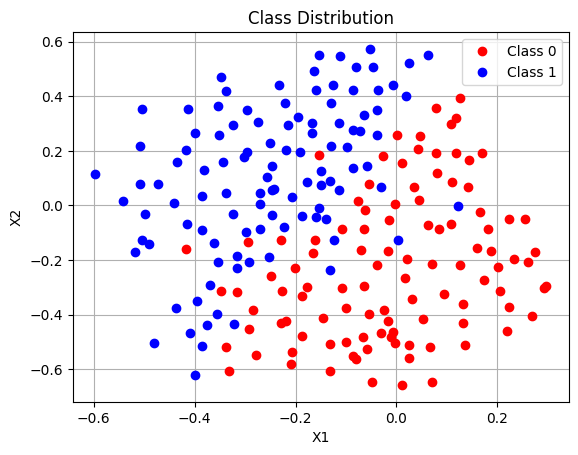

In [3]:
# Load the .mat file
data = loadmat('../resources/data/neural-networks/data.mat')

# Access the variables inside
X = data['X']
Y = data['y']
X_val = data['Xval']
Y_vak = data['yval']

# Check the content
print("X shape:", X.shape)
print("Y shape:", Y.shape)

# Assuming X and y are numpy arrays and already loaded from data.mat
# X should be of shape (n_samples, 2), y should be (n_samples,)

# Find indices of each class
clas1 = np.where(Y == 0)[0]
clas2 = np.where(Y == 1)[0]

# Plotting
plt.figure()
plt.plot(X[clas1, 0], X[clas1, 1], 'or', label='Class 0')  # red circles
plt.plot(X[clas2, 0], X[clas2, 1], 'ob', label='Class 1')  # blue circles
plt.legend()
plt.title("Class Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

In [4]:
x_input = np.transpose(X)

def net_manual(point):
    W1 = np.random.rand(5, 2)
    b1 = np.zeros((5, 1))
    y1 = np.dot(W1, point)+ b1
 
    W2 = np.random.rand(4, 5)
    b2 = np.zeros((4, 1))
    A2 = np.dot(W2 , y1) + b2
    y2 = np.maximum(A2, 0)
    
    W3 = np.random.rand(3, 4)
    b3 = np.zeros((3, 1))
    A3 = np.dot(W3, y2) + b3
    y3 = np.maximum(A3, 0)
    
    W4 = np.random.rand(2, 3)
    b4 = np.zeros((2, 1))
    A4 = np.dot(W4, y3) + b4
    y4 = np.maximum(A4, 0)
    
    W5 = np.random.rand(1, 2)
    b5 = np.zeros((1, 1))
    A5 = np.dot(W5, y4) + b5
    y5 = 1.0 / (1.0 + np.exp(-1 * A5))

    return [y1, y2, y3, y4, y5]

In [5]:
y_layers = net_manual(x_input)
y_5 = y_layers[4]

y_real = np.transpose(Y)

# Derivación de la función de costo

Tenemos que aplicar la **regla de la cadena** para resolver el gradiente para el problema de minimización.

$$
\min \mathcal{L} = \frac{1}{m} \sum -Log(y_5)y - Log(1 - y_5)(1 - y)
$$

Utilizando la regla de la cadena:

$$
\begin{gather}
\frac{\partial \mathcal{L}}{\partial y_5} = \frac{-y}{y_5} + \frac{1 - y}{1 - y_5} \\
\frac{\partial \mathcal{L}}{\partial A_5} = \frac{\partial \mathcal{L}}{\partial y_5} \frac{\partial y_5}{\partial A_5} = y_5 - y = \delta_1 \\
\frac{\partial \mathcal{L}}{\partial W_5} = \frac{\partial \mathcal{L}}{\partial A_5} \frac{\partial A_5}{\partial W_5} = \frac{1}{m} \delta_1 y_4^T \\
\frac{\partial \mathcal{L}}{\partial b_5} = \frac{\partial \mathcal{L}}{\partial A_5} \frac{\partial A_5}{\partial b_5} = \frac{1}{m} \sum \delta_1
\end{gather}
$$

Para saber si los gradientes nos quedaron bien, estos deben tener las mismas dimensiones de la variable que provienen. Esto sería para la capa 5, para la capa 4 tenemos:

$$
\begin{gather}
\frac{\partial \mathcal{L}}{\partial y_4} = \frac{\partial \mathcal{L}}{\partial A_5} \frac{\partial A_5}{\partial y_4} = W_5^T \delta_1 \\
\frac{\partial \mathcal{L}}{\partial A_4} = \frac{\partial \mathcal{L}}{\partial y_4} \frac{\partial y_4}{\partial A_4} = W_5^T \delta_1 (A_4 > 0) \\
\frac{\partial \mathcal{L}}{\partial W_4} = \frac{\partial \mathcal{L}}{\partial A_4} \frac{\partial A_4}{\partial W_4} = \delta_2 y_3^T \\
\frac{\partial \mathcal{L}}{\partial b_4} =  \frac{1}{m} \sum \delta_2 
\end{gather}
$$

Para la **capa 3** tenemos:

$$
\begin{gather}
\frac{\partial \mathcal{L}}{\partial y_3} = W_4^T \frac{\partial \mathcal{L}}{\partial A_4} \\
\frac{\partial \mathcal{L}}{\partial A_3} = \frac{\partial \mathcal{L}}{\partial y_3} (A_3 > 0) \\
\frac{\partial \mathcal{L}}{\partial W_3} = \frac{1}{m} \frac{\partial \mathcal{L}}{\partial A_3} y_2^T \\
\frac{\partial \mathcal{L}}{\partial b_3} =  \frac{1}{m} \sum \frac{\partial \mathcal{L}}{\partial A_3}
\end{gather}
$$

Para la **capa 2** tenemos:

$$
\begin{gather}
\frac{\partial \mathcal{L}}{\partial y_2} = W_3^T \frac{\partial \mathcal{L}}{\partial A_3} \\
\frac{\partial \mathcal{L}}{\partial A_2} = \frac{\partial \mathcal{L}}{\partial y_2} (A_2 > 0) \\
\frac{\partial \mathcal{L}}{\partial W_2} = \frac{1}{m} \frac{\partial \mathcal{L}}{\partial A_2} y_1^T \\
\frac{\partial \mathcal{L}}{\partial b_2} =  \frac{1}{m} \sum \frac{\partial \mathcal{L}}{\partial A_2}
\end{gather}
$$

In [6]:
def grad_layer5(y5, y4, y):
    m = y5.shape[1]

    
    partial_L_w5 = (1.0 / m) * np.dot(y5, np.transpose(y4))
    partial_L_b5 = (1.0 / m) * (y5 - y)

    return [partial_L_w5, partial_L_b5]

In [7]:
grad_layer5(y_layers[4], y_layers[3], y_real)

[array([[0.10556051, 0.08894613]]),
 array([[-0.00220599, -0.00236598, -0.00236967, -0.00236967, -0.00236967,
         -0.00236967, -0.00236967, -0.00231988, -0.00222061, -0.00236967,
         -0.00236967, -0.00236967, -0.00236967, -0.00236967, -0.00236967,
         -0.00236967, -0.00236967, -0.00236967, -0.00236967, -0.00234294,
          0.00236967,  0.00236967,  0.00236967,  0.00236967,  0.00236967,
          0.00236967,  0.00236967,  0.00248442,  0.00239166,  0.00236967,
          0.00236967,  0.00236967,  0.00236967,  0.00236967,  0.00252371,
          0.00241408, -0.00236967, -0.00236967, -0.00219632,  0.00236967,
          0.00236967,  0.00236967,  0.00245186,  0.00252991,  0.00236967,
          0.00236967,  0.00237386,  0.00238664,  0.00236967,  0.00236967,
          0.00236967,  0.00236967,  0.00236967,  0.00236967,  0.00236967,
          0.00236967,  0.00239524,  0.0025246 ,  0.00260476,  0.00269092,
          0.00264507,  0.00255348,  0.0024554 ,  0.00236967,  0.00236967,
  